In [40]:
from collections import defaultdict
from roz.seq import parse_fasta

import networkx as nx
import matplotlib.pyplot as plt

In [46]:
# Options
#path = "test.fasta"
path = "./rosalind_long.txt"
k = 6

In [47]:
with open(path) as handle:
    seqs = parse_fasta(handle)

sdict = {s["id"]: s["seq"] for s in seqs}
seqs

[{'id': 'Rosalind_2818',
  'seq': 'ACTAAGTAGTCTTTTTGAGGTCGTTAACTCTTATAAAGCGGCGCAGCATACCTCCCGAGACTATAGTTTTTCTCAATGCTGAACGCCTCATGGCTTGCCGGGCTCAATGCTGTAATCTGTCTCGGTTCCTGTATACTAGCCGGTACTCCCCAGTTAATTCGACTCGTTGTTTCTCTGTATGTCTCCGATACATCCTAATATAATGTCCCCATGCTTACGCCTATAAAATCGCAATACTGTCTAAGGGAGGTCACTTAATTGTGAAGAGAGCCTAGACAGCGTTCGATTTAGAGCGTCCGTACCAGGATCTTCTATCGGGCTCTGTGATGATTATAGCTATCGCTGACCGCCGGCTCGTCCTAGCGTTTAATACGGCGTACCGACCACTAGGGGGGAGGAAGTAGTTACCATTATCATCCATATCGATTAAGGTGCGTTTCAAGCGTTGACATTAAAGCCGAAACGCAAGGGCAATGCAAGTTCTGGTGTAATCATGGAAGTTAATGTTGCTCGCGTGTGTCAATGCTGGGTACAGGAGAATAGTGTGTATGCGTGTCAGATCCCCCAGCCGCAAAGTCCCCTTCAGTCGTGCCAAGGCGGGAAATTCCAACTCTCGTGTCCCCATTCCCGCGCCTTGCTAAAGACATTACTAGATACGCTTGCTTACGGAGCTACGAAACATGTGTGGCAACTCTCCAGTGCGCAGCGCCCCATAGGTTAGGCACGGAGACAGTTCGCGTACCAGGTTCTAAATTGAGTAGGTTCGCCATGAGCAGTTACCACATACTACCTTGTCTGACACAGGTGACATACCGGCGGGCTGAGTATTGTGATCATGGTGCGTATATATTGTTTCCCGTCCGTCCCCCCGGTGCACGAACTATCATCTAGCCGGCTATTTCGTTCAGTTAGCGTAGCTCGTTGCAGAGAAGTGAATTACGTTAAGGGGATGAGCGCCCAGTCCT

In [48]:
def construct_index(seqs, k): # -> defaultdict(list[tuple])
    index = defaultdict(list)
    for seq in seqs:
        for i in range(len(seq["seq"]) - k + 1):
            index[seq["seq"][i:i+k]].append((seq["id"], i))
    
    return index

index = construct_index(seqs, k)
index

defaultdict(list,
            {'ACTAAG': [('Rosalind_2818', 0),
              ('Rosalind_1941', 780),
              ('Rosalind_3664', 165),
              ('Rosalind_3664', 190),
              ('Rosalind_7616', 136),
              ('Rosalind_0587', 440),
              ('Rosalind_0587', 465),
              ('Rosalind_6946', 172),
              ('Rosalind_3663', 437),
              ('Rosalind_5069', 854),
              ('Rosalind_1935', 702),
              ('Rosalind_8080', 708),
              ('Rosalind_8080', 733),
              ('Rosalind_2815', 405),
              ('Rosalind_6769', 413)],
             'CTAAGT': [('Rosalind_2818', 1),
              ('Rosalind_1787', 532),
              ('Rosalind_8003', 801),
              ('Rosalind_1941', 781),
              ('Rosalind_5379', 117),
              ('Rosalind_6769', 414)],
             'TAAGTA': [('Rosalind_2818', 2),
              ('Rosalind_4701', 851),
              ('Rosalind_2620', 580),
              ('Rosalind_9715', 516),
      

In [56]:
edges = []

for seq in seqs:
    sid1, seq1 = seq["id"], seq["seq"]
    matches = index[seq1[:k]]
    
    for sid2, i in matches:

        if sid1 == sid2:
            continue

        seq2 = sdict[sid2]

        print(sid1, sid2)
        print("", seq2)
        print(" " * i, seq1)
        print("")

        subseq2 = seq2[i:]
        subseq1 = seq1[:len(subseq2)]
        
        match = subseq1 == subseq2
        if match:
            print("Match!")
            edges.append((sid2, sid1, {"i": i, "j": len(subseq2)}))

min_edge = dict()
for edge in edges:
    if edge[[""]
edges

Rosalind_2818 Rosalind_1941
 CAGAACCTCGGTGATGCTAGCGCGGGGTTTGACGAACCGGGGAAGAATTCCCACTGCCTCACTTGGCATGCATTAAGGCTGAATCACATGGCTCGCAAGTCTTCTATGGTGCCGAGGAATGTCTTTGCTTAACAACCATGCCTCGATACCTGAGTCGAAGGACTGGGACAAGGCGGTTTACACCCCCTGGGCCGTTCATGTTCGAGTCGCAGATGCTGTTACGCCTCAGTGAGACGGTGTTTTGCTTCTCGGGTGCTGGCGTCCCCTCGTGTTCTGTGTCAGGGGCTCGAGGACAGACTCGCCCAGGCGGGTATGAAATATTAAATTTTAGGCAACCATGACCGGATGTCTAGGACCGTTCCAATCCGTTAGCTTAGAAATGCTCTTAAATGTCCTATCCGCAGTCAGTCCGTACAGGTGACGCCTCCATAATTGAACGGATTGAATTACGACGTGGACATCAAGCGCGCCCGATTACTTCACCTCATGTTAAAAAGTCACCTCATCTTACCCCGAACCCTAAATCCCACCTGACTGGCTCTCGCGGAAGAAGCTATCGGCTCTTCATCCAAAATGCGTCGCTACCCTACGACGAAGGCATAGTGTGCAACCCACCAGCAAGCTATTCTCGAATCAGAGGCGCAAGGTCATAAGGTGCATAGCTTCGGTTGAAACCCGAACCGTTCGGCTTGGACGGACGCTTGATCAAGGTGGCCCACTGTAGGGGTAAGACCTGATCAGAGAAGTTAACGCCTTTTCCGACGCCCTGGGACGGGCCAGACTAAGTAGTCTTTTTGAGGTCGTTAACTCTTATAAAGCGGCGCAGCATACCTCCCGAGACTATAGTTTTTCTCAATGCTGAACGCCTCATGGCTTGCCGGGCTCAATGCTGTAATCTGTCTCGGTTCCTGTATACTAGCCGGTACTCCCCAGTTAATTCGACTCGTTGTTTCTCTGTATGTCTCCGATAC

 GGAGTAGACAATATCAAGCCTGATCGCCTGCACGCAATGAACCCCTTTGAAATGGGCGGGGGAGTAAACTAATGTTTTACCGTGGAGGGTTCGGGTTTGTCTTGCCTTACTCTCCCAAGGACGCATATAATCACACGGTTAACGCTTTCCACACCGTGGGCTCCTTAACTACGCTTTGACGTTACATGATCTGTCTACTTCATGACAACTCGTTCCAGGGAGCAGCGTCCTTACCTGGCGAGAAGTGCTGTAACCCGATTCCGCGAGGGATGTTGCCGTGGCAAACTCCTGAAAATGTAATCCCACTTTGCCAGATATGCCTAATTAGAACTCCCGAGAGCGCCCTATCCTGCGACCCGCACAGGTGAACTCACGGGGGAATTGACGTATGATCACGGATTTTTATTCCGTTAAGCTTTCATAGGAAGGAACACGGTCCCAAGTTATTACAAGTCACAAAAATGAGAAGCCTTAATCCTTAGTTTTGGTAGACGAGTCGCGAGTCGCGAGATCGGTATTAGGGGAGCGCCTCGCTTGCCCACTTAGAATGTCTTTTTTCACTTAAGTTACAAGATCTTGATCATCCAGTATCTCGCCCCTGCTAACCCTATATAGCTCACGGGAGTATGTCTGGGTATACATGACGAGACATCAAAACACTTCTTTGAGAGATCCACAATAGTTTTGTATGTCGCCTACTCGGTACGTGTCCCCGATGCCAATGTGGAGCATGGTAGGCATTCTAGGTTTAGTCTCACCATTGGTCTCCAAGGCAATAGATAGTAGTGACTACACTACCACGCTAACTCTAAGAAATGCGCAGCACTGACAGGGAGTCAGCTTCATCGGCGGTTTCGGGTAAAGGACATTTATGGTCGAACTGGGAACGGTCTGATCAATAGCTAGGTCGGCGGCCTGGCCTCGGAACTCATTGGCCTTTCTGGCTCTTAACTTTATCGTTTACCGTTCACGTCCTCGTGGGACT
             

[('Rosalind_1941', 'Rosalind_2818', {'i': 780, 'j': 218}),
 ('Rosalind_6769', 'Rosalind_2818', {'i': 413, 'j': 576}),
 ('Rosalind_8003', 'Rosalind_1787', {'i': 269, 'j': 716}),
 ('Rosalind_2246', 'Rosalind_1787', {'i': 619, 'j': 370}),
 ('Rosalind_7125', 'Rosalind_2351', {'i': 762, 'j': 223}),
 ('Rosalind_7074', 'Rosalind_2351', {'i': 374, 'j': 606}),
 ('Rosalind_5161', 'Rosalind_8041', {'i': 593, 'j': 404}),
 ('Rosalind_6204', 'Rosalind_8041', {'i': 300, 'j': 699}),
 ('Rosalind_1010', 'Rosalind_8003', {'i': 734, 'j': 257}),
 ('Rosalind_2246', 'Rosalind_8003', {'i': 350, 'j': 639}),
 ('Rosalind_2830', 'Rosalind_1010', {'i': 346, 'j': 639}),
 ('Rosalind_5023', 'Rosalind_1010', {'i': 818, 'j': 179}),
 ('Rosalind_8041', 'Rosalind_2463', {'i': 253, 'j': 744}),
 ('Rosalind_5161', 'Rosalind_2463', {'i': 846, 'j': 151}),
 ('Rosalind_6204', 'Rosalind_2463', {'i': 553, 'j': 446}),
 ('Rosalind_4644', 'Rosalind_7783', {'i': 718, 'j': 262}),
 ('Rosalind_5970', 'Rosalind_7783', {'i': 280, 'j': 714}

In [57]:
G = nx.DiGraph()
G.add_nodes_from([s["id"] for s in seqs])

G.add_edges_from(edges)

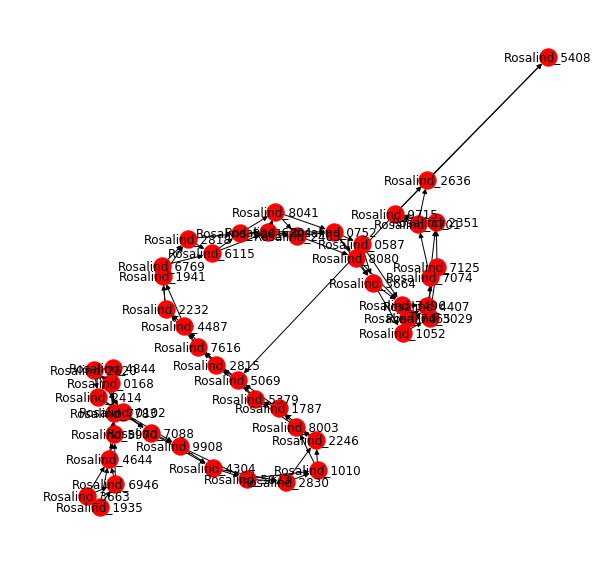

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))

nx.draw(G, ax=ax, with_labels=True, layout="circular")